# Linear Regression

#### 회귀
- 회귀의 원래 의미는 옜날 상태로 돌아가는 것을 의미
- 영국의 유전학자 **프랜시스 골턴**은 부모의 키와 아이들의 키 사이의 연관 관계를 연구하면서 부모와 자녀 키 사이에 선형적인 관계가 있고 **전체 키 평균으로 돌아가려는 경향**이 있다는 가설을 세움
- 이를 분석하는 방법이 회귀분석

#### 선형 회귀 이해
<div style="text-align:center;">
    <img src="https://github.com/Ha-coding-user/aivle_study/blob/main/ML/imge/Basic_algorithm1.jpg?raw=true" width=50%></img>
</div>

- 네 점을 지나는 직선을 찾아봄
- 직선이므로 y = ax + b 에서 기울기 a와 y절편 b를 결정해야 함
- 위 그래프에선 a = 1, b = 0

**모든 데이터가 위와 같이 fitting이 잘 되는 경우는 거의 없음**
- 최선의 직선을 긋기가 쉽지 않음
- y = ax + b 에서 최선의 기울기 a와 y절편 b를 결정하는 방법이 필요하다 -> 선형 회귀

#### 알아둘 기호
$$ y : 실제값(Actual)\quad\hat{y} : 예측값(Predicted)\quad\bar{y} : 평균값(Mean) $$
<div style="text-align:center;">
    <img src="https://github.com/Ha-coding-user/aivle_study/blob/main/ML/imge/Basic_algorithm2.jpg?raw=true" width=75%>
</div>

#### 최적의 회귀모델
- 최선의 회귀모델은 전체 데이터의 **오차 합이 최소**가 되는 모델을 의미
- 즉, 오차 합이 최소가 되는 가중치와 편향을 찾는 것

<div style="text-align:center;">
    <img src="https://github.com/Ha-coding-user/aivle_study/blob/main/ML/imge/Basic_algorithm3.jpg?raw=true" width=60%>
</div>

$$ MSE = \frac{\sum(y-\hat{y})^2}{n}

#### 단순 회귀
- 독립변수 하나가 종속변수에 영향을 미치는 선형 회귀
- x값 하나만으로 y값을 설명
- 회귀식 $ \hat{y} = w_0 + w_1x_1 $

#### 다중 회귀
- 여러 독립변수가 종속변수에 영향을 미치는 선형 회귀
- y값을 설명하기 위해서는 여러 개의 x값이 필요한 경우
- 회귀식 $ \hat{y} = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n $

#### 실습
- Cars 데이터를 불러옴

**1. 환경 준비**

In [1]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# Data 읽어오기
path = 'https://bit.ly/CarsFile'
data = pd.read_csv(path)

**2. 데이터 이해**

In [3]:
# 상위 5개 행 확인
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [4]:
# 하위 5개 행 확인
data.tail()

,speed,dist
45,24,70
46,24,92
47,24,93
48,24,120
49,25,85


In [5]:
# 기초통계량 확인
data.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [6]:
# 변수 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes


In [7]:
# Nan 값 확인
data.isna().sum()

speed    0
dist     0
dtype: int64

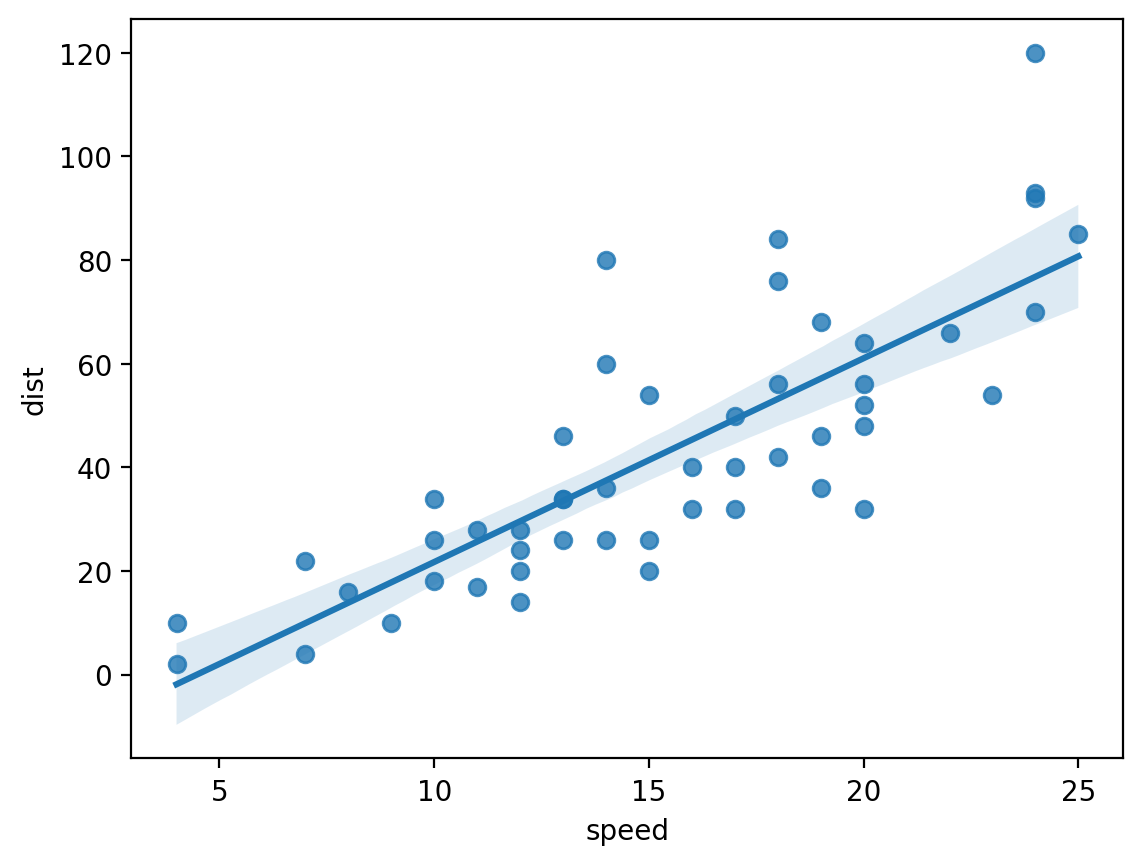

In [8]:
# speed, dist 관계
sns.regplot(x='speed', y='dist', data=data)
plt.show()

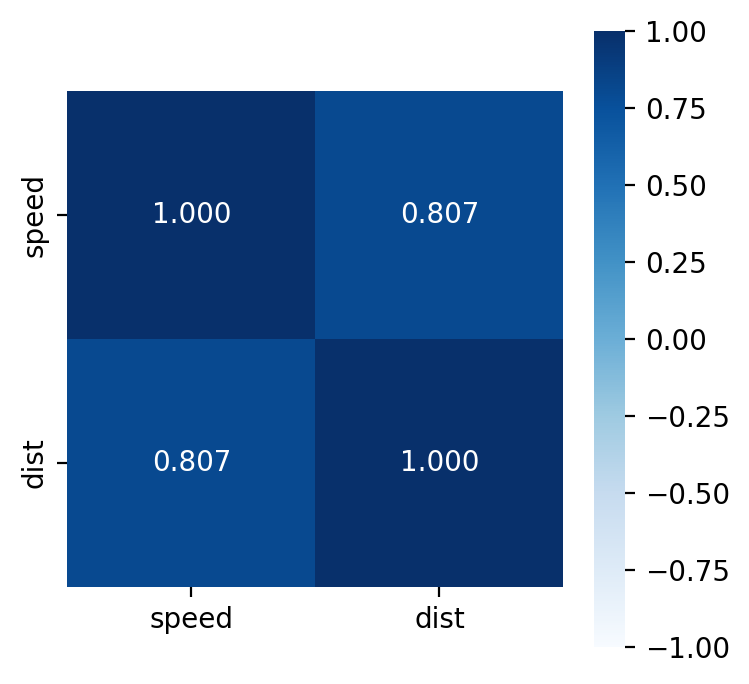

In [9]:
# 상관관계 heatmap으로 확인
plt.figure(figsize=(4, 4))
sns.heatmap(data.corr(),
            annot=True,
            fmt='.3f',
            vmin=-1, vmax=1,
            square=True,
            cmap='Blues')
plt.show()

**3. 데이터 준비**
- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비

**1) x, y 분리**

In [12]:
# target 확인
target = 'dist'

# x, y 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

In [13]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3 으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [14]:
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (35, 1)
x_test.shape: (15, 1)
y_train.shape: (35,)
y_test.shape: (15,)


**4. 모델링**

In [15]:
# 1단계 : 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [16]:
# 2단계 : 선언하기
model = LinearRegression()

In [17]:
# 3단계 : 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# 4단계 : 예측하기
y_pred = model.predict(x_test)

In [19]:
# 5단계 : 평가하기
print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

mae: 15.113442990354985
r2: 0.5548332681132089


In [20]:
# 회귀 계수 확인
print(model.coef_)
print(model.intercept_)

[3.91046344]
-16.373364149357677


$$\large Distance(\hat{y}) = 3.91 * Speed - 16.37 $$

**5. 기타**

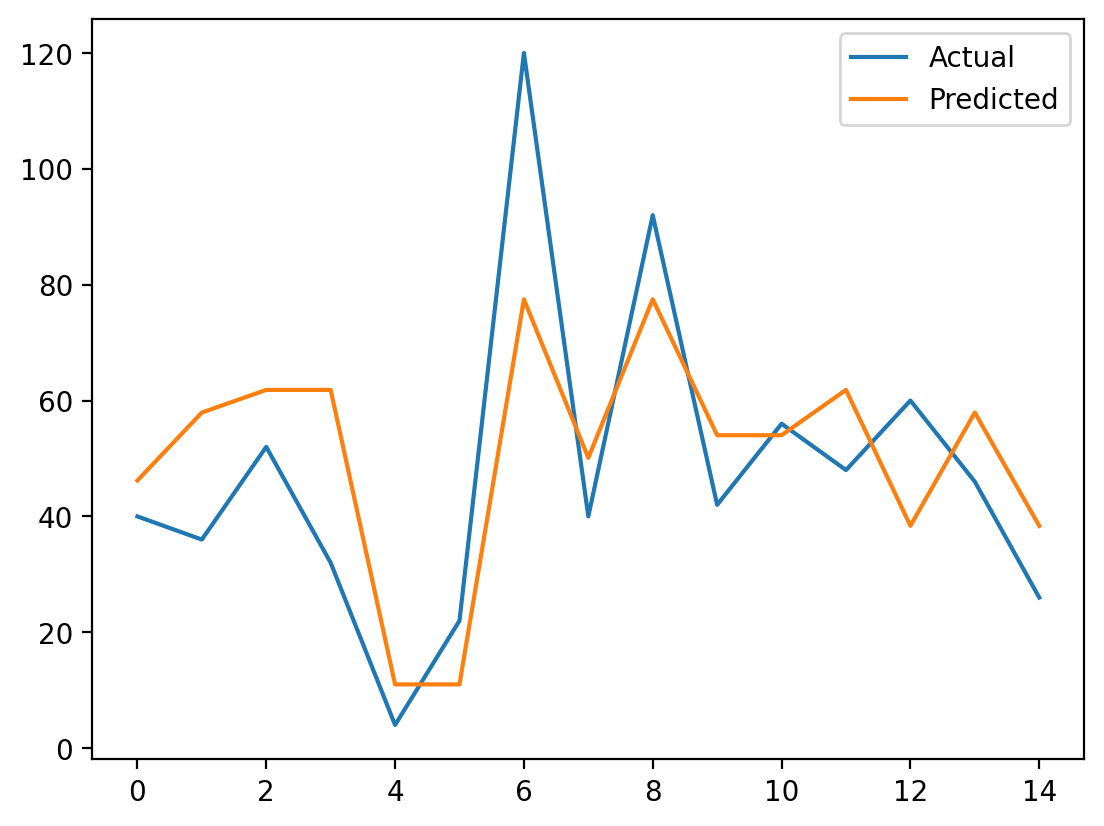

In [21]:
# 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [22]:
# 회귀식 만들기
a = model.coef_
b = model.intercept_

speed = [min(x_test['speed']), max(x_test['speed'])]
dist = a * speed + b

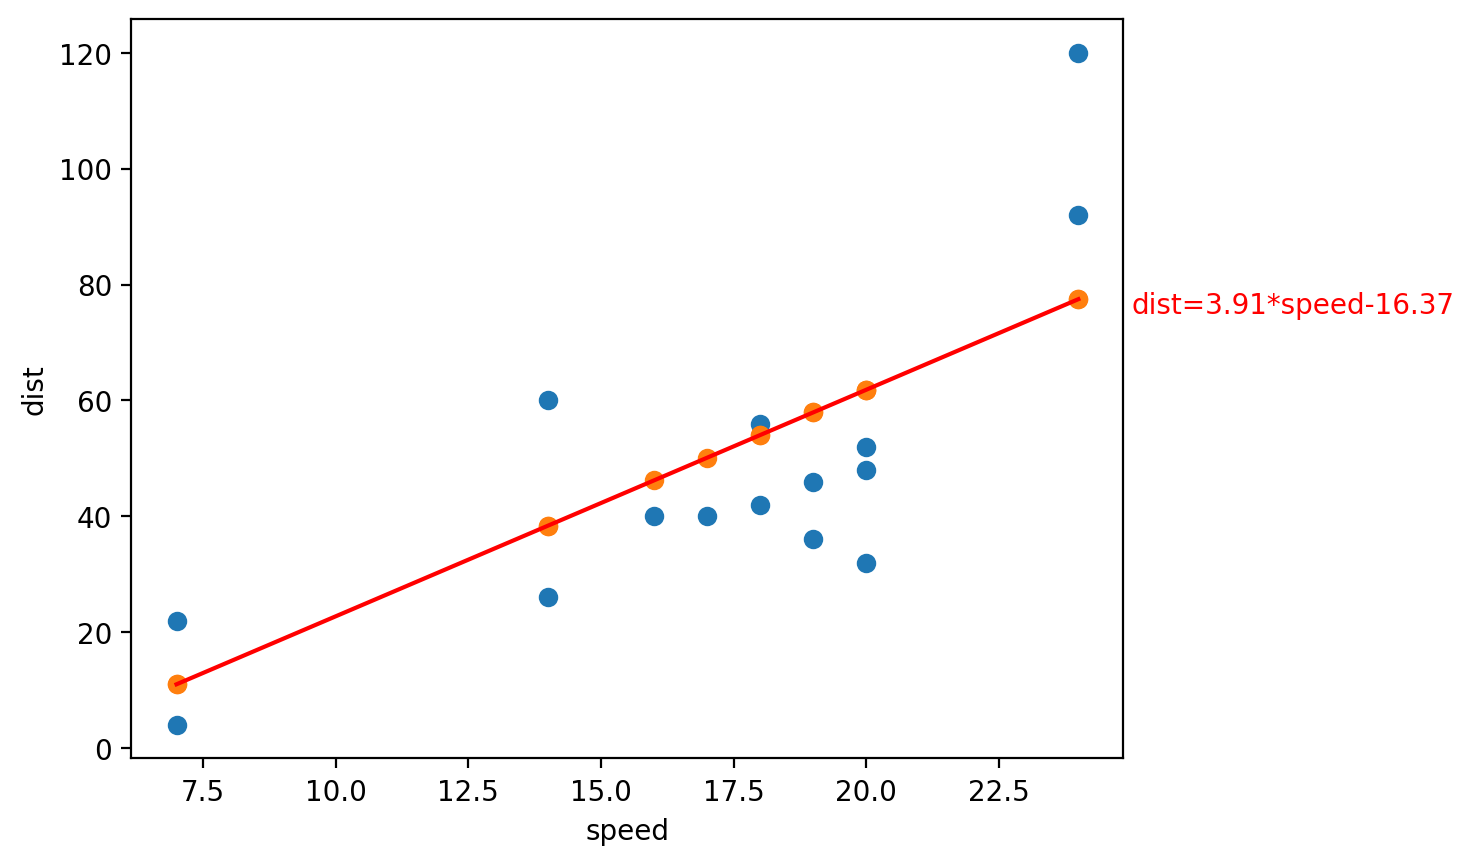

In [24]:
plt.scatter(x_test['speed'], y_test.values)
plt.scatter(x_test['speed'], y_pred)
plt.plot(speed, dist, 'r')
plt.xlabel('speed')
plt.ylabel('dist')
plt.text(25, 75, 'dist=3.91*speed-16.37', color='r')
plt.show()